### Convolutional Neural Networks

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-10-11 12:32:40.829752


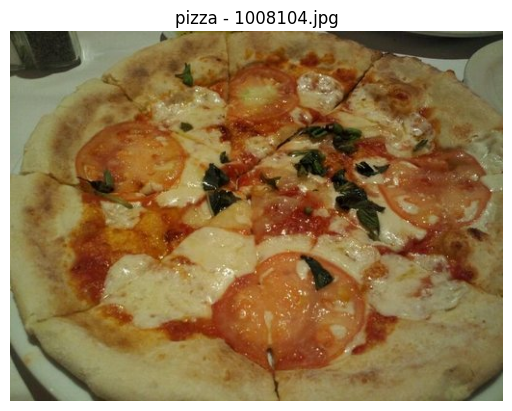

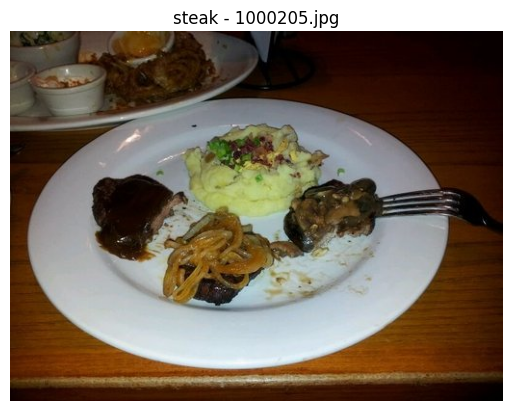

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt


train_dir = 'c:/Users/user/Desktop/mrdbourke/03_CNN/pizza_steak/pizza_steak/train'


categories = ['pizza', 'steak']

for category in categories:
    category_path = os.path.join(train_dir, category)
    
    # Get the list of all image filenames in the folder
    image_filenames = os.listdir(category_path)
    
    # Load the first image in the folder as an example
    first_image_path = os.path.join(category_path, image_filenames[0])
    image = Image.open(first_image_path)
    
    # Display the image using matplotlib
    plt.imshow(image)
    plt.title(f"{category} - {image_filenames[0]}")
    plt.axis('off')
    plt.show()


In [3]:
# find the number of steak images in the train set
num_steak_images_train = len(os.listdir("c:/Users/user/Desktop/mrdbourke/03_CNN/pizza_steak/pizza_steak/train/steak"))

num_steak_images_train

750

In [4]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("c:/Users/user/Desktop/mrdbourke/03_CNN/pizza_steak/pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


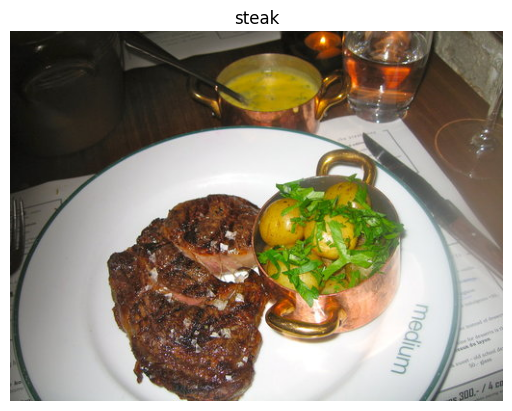

In [6]:
img = view_random_image(target_dir="c:/Users/user/Desktop/mrdbourke/03_CNN/pizza_steak/pizza_steak/train/",
                        target_class="steak")

In [7]:
img

array([[[ 19,  19,  11],
        [ 20,  20,  12],
        [ 20,  20,  12],
        ...,
        [ 58,  44,  35],
        [ 63,  46,  38],
        [ 72,  55,  47]],

       [[ 21,  21,  13],
        [ 21,  21,  13],
        [ 22,  22,  14],
        ...,
        [ 66,  52,  43],
        [ 65,  51,  42],
        [ 61,  44,  36]],

       [[ 21,  21,  13],
        [ 21,  21,  13],
        [ 22,  22,  14],
        ...,
        [ 61,  48,  39],
        [ 63,  50,  41],
        [ 64,  51,  42]],

       ...,

       [[ 99, 100,  95],
        [100, 101,  96],
        [101, 102,  97],
        ...,
        [106, 108, 103],
        [105, 107, 102],
        [103, 105, 100]],

       [[ 99, 100,  95],
        [ 99, 100,  95],
        [101, 102,  97],
        ...,
        [103, 105, 100],
        [102, 104,  99],
        [101, 103,  98]],

       [[ 98,  99,  94],
        [ 99, 100,  95],
        [101, 102,  97],
        ...,
        [102, 104,  99],
        [100, 102,  97],
        [100, 102,  97]]

In [8]:
img.shape

(384, 512, 3)

In [9]:
# Get all the pixel values between 0 & 1 bcz ML models prefer the values to be like that
img/255

array([[[0.0745098 , 0.0745098 , 0.04313725],
        [0.07843137, 0.07843137, 0.04705882],
        [0.07843137, 0.07843137, 0.04705882],
        ...,
        [0.22745098, 0.17254902, 0.1372549 ],
        [0.24705882, 0.18039216, 0.14901961],
        [0.28235294, 0.21568627, 0.18431373]],

       [[0.08235294, 0.08235294, 0.05098039],
        [0.08235294, 0.08235294, 0.05098039],
        [0.08627451, 0.08627451, 0.05490196],
        ...,
        [0.25882353, 0.20392157, 0.16862745],
        [0.25490196, 0.2       , 0.16470588],
        [0.23921569, 0.17254902, 0.14117647]],

       [[0.08235294, 0.08235294, 0.05098039],
        [0.08235294, 0.08235294, 0.05098039],
        [0.08627451, 0.08627451, 0.05490196],
        ...,
        [0.23921569, 0.18823529, 0.15294118],
        [0.24705882, 0.19607843, 0.16078431],
        [0.25098039, 0.2       , 0.16470588]],

       ...,

       [[0.38823529, 0.39215686, 0.37254902],
        [0.39215686, 0.39607843, 0.37647059],
        [0.39607843, 0

### A (typical) architecture of a convolutional neural network

### An end-to-end example

In [10]:
train_dir = "c:/Users/user/Desktop/mrdbourke/03_CNN/pizza_steak/pizza_steak/train/"
test_dir = "c:/Users/user/Desktop/mrdbourke/03_CNN/pizza_steak/pizza_steak/test/"

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)



# Import data from directories and turn it into batches
# flow_from_directory loads images from the directories and automatically labels them based on the folder structure.
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # This is a standard step
                                               class_mode="binary", # binary stands for binary output of the classification problem not binary image
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), 
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(), #Flattens the 2D feature maps into a 1D vector
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


c:\Users\user\Desktop\mrdbourke\virenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\user\Desktop\mrdbourke\virenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - accuracy: 0.6353 - loss: 0.6178 - val_accuracy: 0.7900 - val_loss: 0.4447
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


C:\Program Files\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.7990 - loss: 0.4393 - val_accuracy: 0.8680 - val_loss: 0.3509
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.8383 - loss: 0.3924 - val_accuracy: 0.8720 - val_loss: 0.3259


In [12]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

Now we will use the same model as before to examplify how neural networks can be adapted to many different problems, so we will use a binary classification model we've previously built and see how it will work with our data.

In [12]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

c:\Users\user\Desktop\mrdbourke\virenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.4914 - loss: 0.7111 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.4965 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.4880 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


Our model reaches 50% in accucary

In [13]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.

 So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image and this is because of the way CNNs work.

Now let's try enhancing the performance of model_2 by incresing the complexity of the model by adding more layers and more neurones to each layer.

In [14]:
tf.random.set_seed(42)

# Create a model similar to model_2 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), 
  tf.keras.layers.Dense(100, activation='relu'), 
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.5992 - loss: 6.5058 - val_accuracy: 0.6060 - val_loss: 1.2157
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.6794 - loss: 1.0332 - val_accuracy: 0.6560 - val_loss: 1.0877
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.7051 - loss: 0.8689 - val_accuracy: 0.6680 - val_loss: 0.7246


The model got ~70% accuracy on the training set and ~70% accuracy on the validation set.

In [15]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

Even though the number of trainable parameters is vastly larger than that of model_1, model_1 (CNN) still outperforms model_3 and this shows the ability of CNNs to learn patterns despite using less parameters

### Binary classification

#### 1-Import and become one with the data

Image shape: (384, 512, 3)
Image shape: (384, 512, 3)


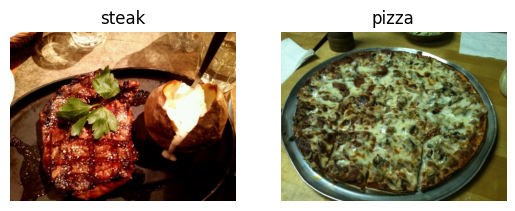

In [16]:
# Visualize data 
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("c:/Users/user/Desktop/mrdbourke/03_CNN/pizza_steak/pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("c:/Users/user/Desktop/mrdbourke/03_CNN/pizza_steak/pizza_steak/train/", "pizza")


We notice that the steak images tend to be darker, the pizza image tend to have a circular shape in the middle, these features can help us building our model.


#### 2. Preprocess the data 

In [13]:
train_dir = "c:/Users/user/Desktop/mrdbourke/03_CNN/pizza_steak/pizza_steak/train/"
test_dir = "c:/Users/user/Desktop/mrdbourke/03_CNN/pizza_steak/pizza_steak/test/"

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [15]:
# Turn data into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
# Get a sample of the training data batch
images, labels = next(train_data)
len(images), len(labels)

(32, 32)

In [17]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.6313726 , 0.7176471 , 0.6666667 ],
          [0.7254902 , 0.7960785 , 0.7411765 ],
          [0.5647059 , 0.61960787, 0.56078434],
          ...,
          [0.19607845, 0.16470589, 0.12156864],
          [0.24313727, 0.20000002, 0.1764706 ],
          [0.22352943, 0.17254902, 0.14901961]],
 
         [[0.44705886, 0.5137255 , 0.4901961 ],
          [0.31764707, 0.37647063, 0.34901962],
          [0.3647059 , 0.4039216 , 0.36862746],
          ...,
          [0.42352945, 0.38823533, 0.27450982],
          [0.23137257, 0.19215688, 0.09411766],
          [0.34117648, 0.29411766, 0.20000002]],
 
         [[0.21176472, 0.2509804 , 0.25490198],
          [0.34509805, 0.36862746, 0.36078432],
          [0.5568628 , 0.5686275 , 0.5411765 ],
          ...,
          [0.8862746 , 0.8431373 , 0.6627451 ],
          [0.76470596, 0.7137255 , 0.5411765 ],
          [0.8196079 , 0.7607844 , 0.6       ]],
 
         ...,
 
         [[0.9686275 , 1.        , 0.9725491 ],
          [0.96470

In [18]:
# View the first batch of labels
labels

array([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.],
      dtype=float32)

### 3. Create a model (start with a baseline)

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [22]:
# Create a 3 layer CNN
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=3,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [23]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### 4-Fit the model

In [24]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # steps per epoch = len(train_data) which is 1500/32 = 47
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.6829 - loss: 0.5894 - val_accuracy: 0.8240 - val_loss: 0.4159
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.8062 - loss: 0.4521 - val_accuracy: 0.8400 - val_loss: 0.3632
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.8300 - loss: 0.3896 - val_accuracy: 0.8760 - val_loss: 0.3352


### 5-Evaluate the model

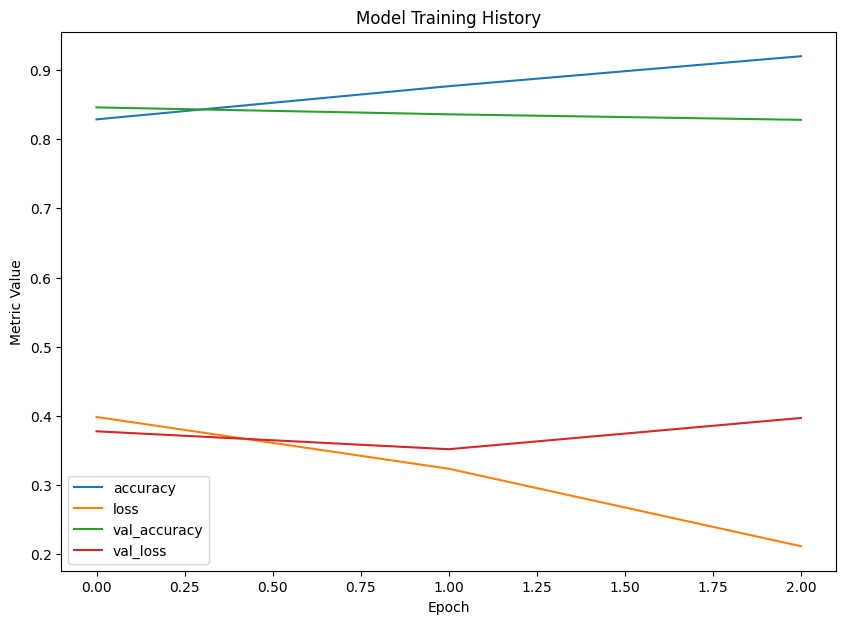

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out zero values
history_dict = {key: [value for value in values if value != 0] 
                for key, values in history_4.history.items()}

# Create DataFrame and plot
history_df = pd.DataFrame(history_dict)
history_df.plot(figsize=(10, 7))
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

It seems like our model is overfitting (because the validation loss increases)

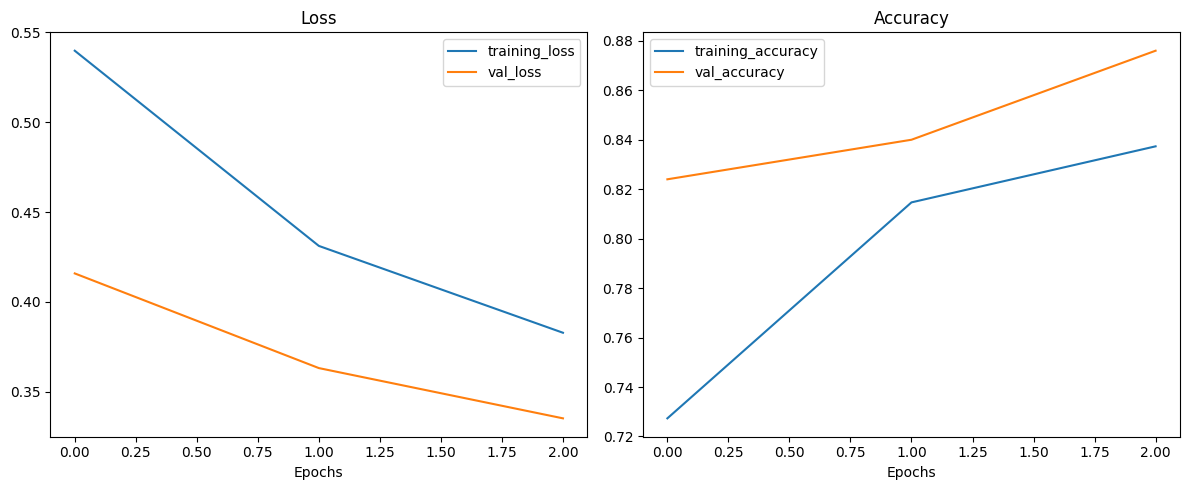

In [25]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    # Get the metrics from the history object
    metrics = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
    
    # Filter out zero values and get the maximum length
    filtered_history = {metric: [v for v in history.history[metric] if v != 0] for metric in metrics}
    max_len = max(len(filtered_history[metric]) for metric in metrics)
    
    # Pad shorter lists with None
    padded_history = {metric: filtered_history[metric] + [None] * (max_len - len(filtered_history[metric])) for metric in metrics}
    
    epochs = range(max_len)

    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, padded_history['loss'], label='training_loss')
    plt.plot(epochs, padded_history['val_loss'], label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, padded_history['accuracy'], label='training_accuracy')
    plt.plot(epochs, padded_history['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Now you can call the function
plot_loss_curves(history_4)

if there's a large gap between the training curve and the validation curve, it means our model is probably overfitting

In [30]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 74, 74, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 70, 70, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 49000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │        49,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,305 (598.85 KB)

 Trainable params: 51,101 (199.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 102,204 (399.24 KB)

### 6- Adjust the model parameters

It'll have the same structure as `model_4` but with a [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer after each convolutional layer.

In [31]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2), 
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

c:\Users\user\Desktop\mrdbourke\virenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [33]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.5633 - loss: 0.6737 - val_accuracy: 0.6800 - val_loss: 0.5694
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
 1/47 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.7812 - loss: 0.4858

C:\Program Files\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.7535 - loss: 0.5126 - val_accuracy: 0.8100 - val_loss: 0.4076
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.7807 - loss: 0.4671 - val_accuracy: 0.8340 - val_loss: 0.3832


In [34]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

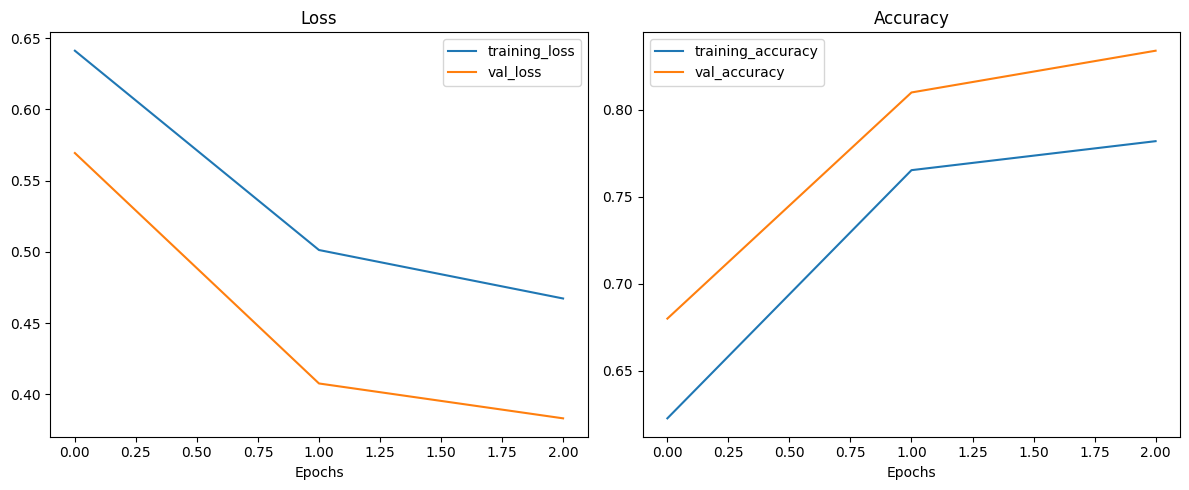

In [35]:
plot_loss_curves(history_5)

Now we can see that the training curves get a lot closer to each other.

Another method for overfitting prevention is augmentation.

In [26]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=20,
                                             shear_range=20,
                                             zoom_range=0.2,
                                             width_shift_range=0.2, 
                                             height_shift_range=0.2, 
                                             horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [33]:
# Import data and augment if from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size=32,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   shuffle=False)


# Create non-augmented data batches
print("Non-augmented training images:")

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [34]:
# Get data batch samples
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

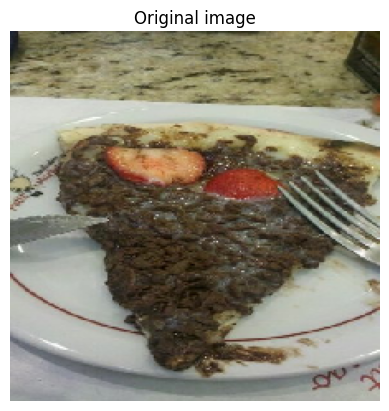

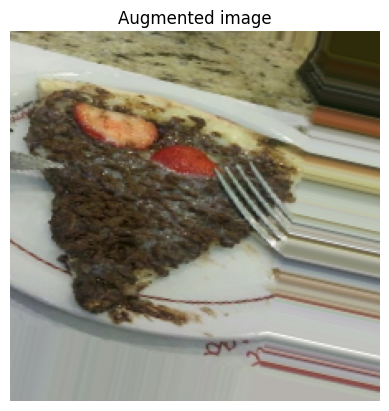

In [67]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [36]:

# Create the model (same as model_5 but with augmented data)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


c:\Users\user\Desktop\mrdbourke\virenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\user\Desktop\mrdbourke\virenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 268ms/step - accuracy: 0.3633 - loss: 0.7574 - val_accuracy: 0.5000 - val_loss: 0.6871
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 147us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


C:\Program Files\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - accuracy: 0.5672 - loss: 0.7078 - val_accuracy: 0.5340 - val_loss: 0.6866
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 150us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 265ms/step - accuracy: 0.4245 - loss: 0.6990 - val_accuracy: 0.5940 - val_loss: 0.6786


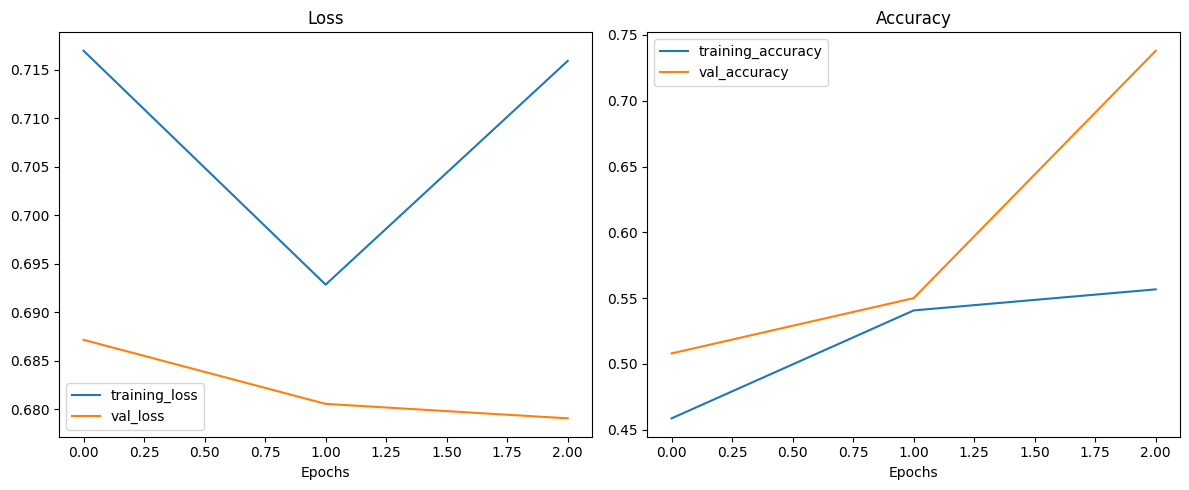

In [28]:
plot_loss_curves(history_6)

In [28]:
train_data_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Import data and augment it from directories (with shuffle=True)
train_data_augmented_shuffled = train_data_augmented.flow_from_directory(train_dir,
                                                                        target_size=(224, 224),
                                                                        batch_size=32,
                                                                        class_mode='binary',
                                                                        shuffle=True)

Found 1500 images belonging to 2 classes.


In [45]:
# Create the model (same as model_5 and model_6 but with shuffled data)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

c:\Users\user\Desktop\mrdbourke\virenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\user\Desktop\mrdbourke\virenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 263ms/step - accuracy: 0.5557 - loss: 0.6757 - val_accuracy: 0.7700 - val_loss: 0.5024
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


C:\Program Files\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 257ms/step - accuracy: 0.7203 - loss: 0.5665 - val_accuracy: 0.8280 - val_loss: 0.4311
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 258ms/step - accuracy: 0.7471 - loss: 0.5235 - val_accuracy: 0.8520 - val_loss: 0.4187


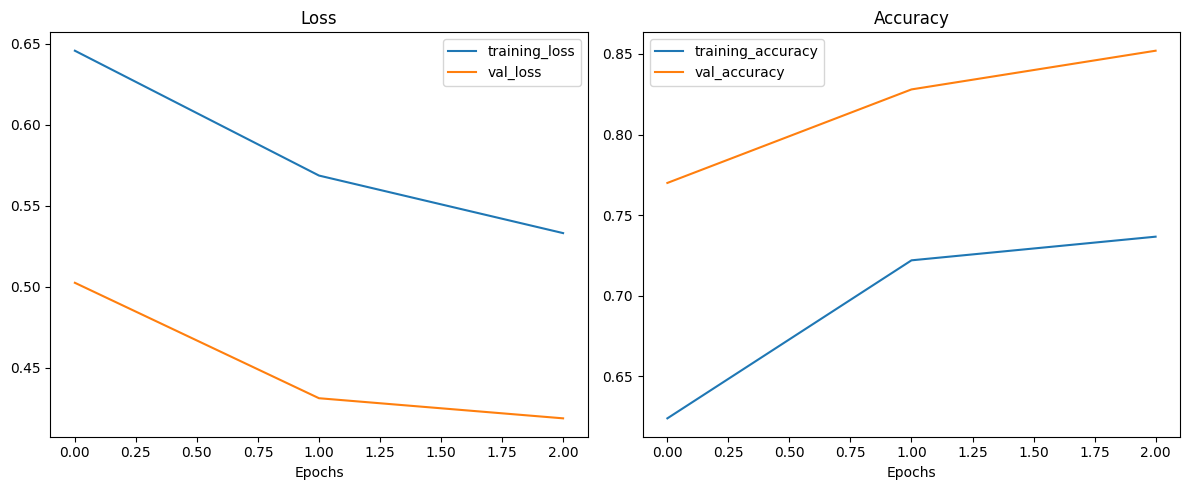

In [46]:
plot_loss_curves(history_7)

With `model_7` the performance on the training dataset improves almost immediately compared to `model_6`. This is because we shuffled the training data as we passed it to the model.

### 7. Repeat until satisfied

In [29]:
# Create a CNN model (increase number of Convolutional layers)
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 389ms/step - accuracy: 0.6018 - loss: 0.6417 - val_accuracy: 0.8220 - val_loss: 0.4016
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


C:\Program Files\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 403ms/step - accuracy: 0.7510 - loss: 0.4968 - val_accuracy: 0.8340 - val_loss: 0.3690
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 379ms/step - accuracy: 0.7699 - loss: 0.4721 - val_accuracy: 0.8420 - val_loss: 0.3625


In [48]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [49]:
model_8.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

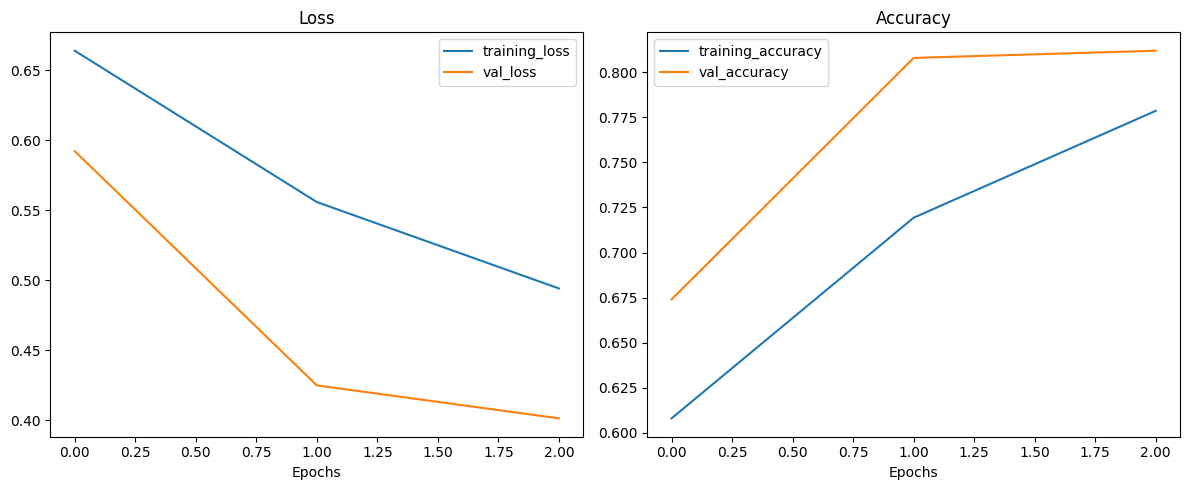

In [54]:
plot_loss_curves(history_8)

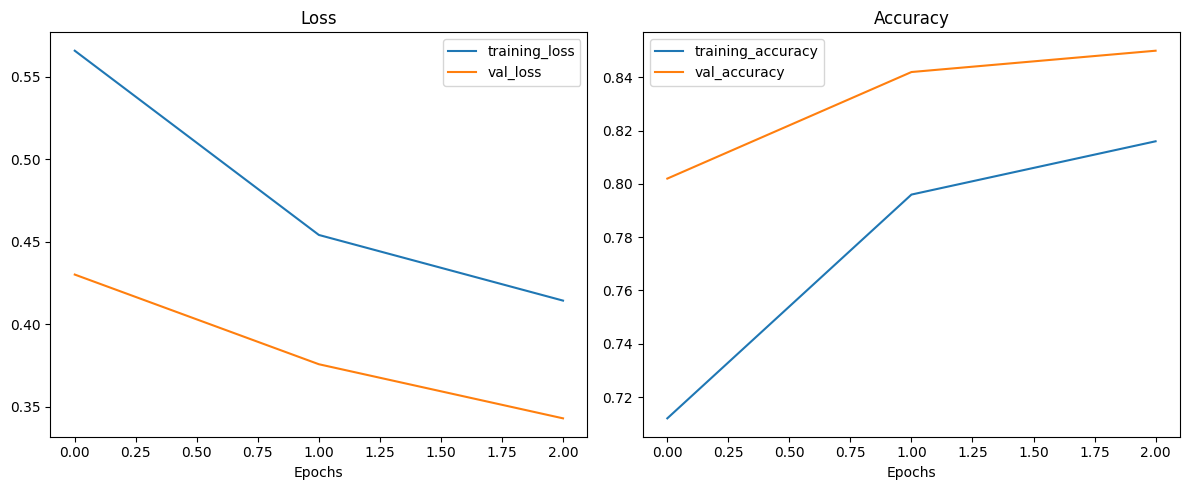

In [55]:
plot_loss_curves(history_1)

In [56]:
print(class_names)

['pizza' 'steak']


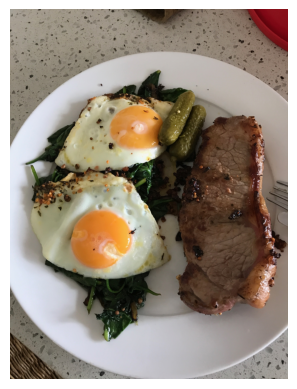

In [45]:
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Download the image using requests
url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg"
response = requests.get(url)
open("03-steak.jpeg", "wb").write(response.content)

# Read and display the image
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)
plt.show()


In [32]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [46]:
steak = load_and_prep_image("03-steak.jpeg", 224)

In [48]:
model_8.predict(steak)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [49]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [50]:
pred = model_8.predict(steak)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.80857104]], dtype=float32)

In [51]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [52]:
def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


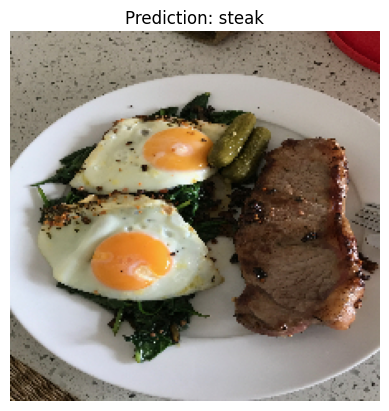

In [53]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


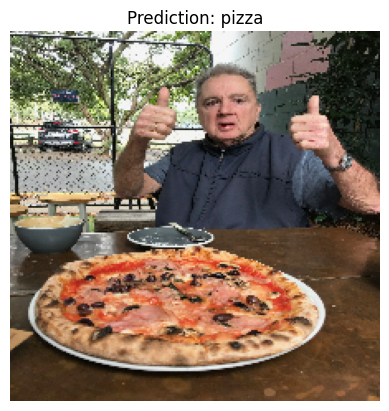

In [33]:
import requests
import os
from PIL import Image

# Download the image
url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg"
response = requests.get(url)
with open("03-pizza-dad.jpeg", "wb") as f:
    f.write(response.content)

pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)


Great job so far !!!